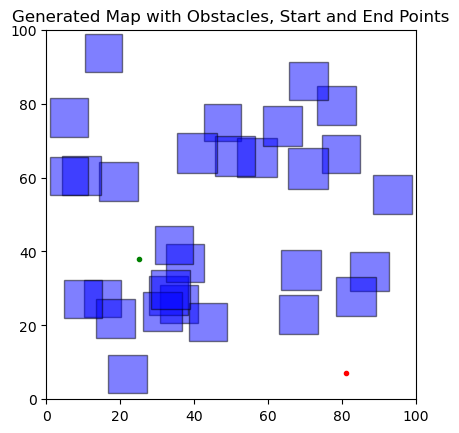

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Define the function to generate squares
def generate_squares(num_squares, size_range, canvas_size):
    squares = []
    for _ in range(num_squares):
        size = np.random.uniform(*size_range)
        x = np.random.uniform(0, canvas_size - size)
        y = np.random.uniform(0, canvas_size - size)
        squares.append((x, y, size))
    return squares

# Function to check if a point is inside any square
def is_point_in_squares(point, squares, robot_diameter):
    px, py = point
    for (x, y, size) in squares:
        if (x - robot_diameter <= px <= x + size + robot_diameter) and (y - robot_diameter <= py <= y + size + robot_diameter):
            return True
    return False

# Define parameters
num_squares = 30  # Number of squares to generate
size_range = (10, 11)  # Range of square sizes
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

# Generate squares
squares = generate_squares(num_squares, size_range, canvas_size)

# Generate a random start point that does not overlap with any square
while True:
    start_point = (np.random.randint(0, canvas_size), np.random.randint(0, canvas_size))
    if not is_point_in_squares(start_point, squares, robot_diameter):
        break

# Generate a random end point that does not overlap with any square
while True:
    end_point = (np.random.randint(0, canvas_size), np.random.randint(0, canvas_size))
    if not is_point_in_squares(end_point, squares, robot_diameter):
        break

map_data = {
    'squares': squares,
    'start_point': start_point,
    'end_point': end_point
}

# Plot the generated map to visualize
fig, ax = plt.subplots()
for (x, y, size) in squares:
    square = plt.Rectangle((x, y), size, size, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(square)

# Plot start and end points
ax.plot(start_point[0], start_point[1], 'go', markersize=robot_diameter)  # Green start point
ax.plot(end_point[0], end_point[1], 'ro', markersize=robot_diameter)  # Red end point

# Set plot parameters
ax.set_xlim(0, canvas_size)
ax.set_ylim(0, canvas_size)
ax.set_aspect('equal', adjustable='box')
plt.title("Generated Map with Obstacles, Start and End Points")
plt.show()

with open('map_data.pkl', 'wb') as f:
    pickle.dump(map_data, f)


Current node: (25, 38)
Adding neighbor: (24, 38), g_score: 1, f_score: 89
Adding neighbor: (26, 38), g_score: 1, f_score: 87
Adding neighbor: (25, 37), g_score: 1, f_score: 87
Adding neighbor: (25, 39), g_score: 1, f_score: 89
Adding neighbor: (24, 37), g_score: 1, f_score: 88
Adding neighbor: (24, 39), g_score: 1, f_score: 90
Adding neighbor: (26, 39), g_score: 1, f_score: 88
Current node: (25, 37)
Adding neighbor: (24, 36), g_score: 2, f_score: 88
Current node: (26, 38)
Current node: (24, 36)
Adding neighbor: (23, 36), g_score: 3, f_score: 90
Adding neighbor: (24, 35), g_score: 3, f_score: 88
Adding neighbor: (23, 37), g_score: 3, f_score: 91
Current node: (24, 35)
Adding neighbor: (24, 34), g_score: 4, f_score: 88
Current node: (24, 34)
Adding neighbor: (24, 33), g_score: 5, f_score: 88
Current node: (24, 33)
Adding neighbor: (24, 32), g_score: 6, f_score: 88
Current node: (24, 32)
Current node: (24, 37)
Adding neighbor: (23, 37), g_score: 2, f_score: 90
Adding neighbor: (23, 36), g

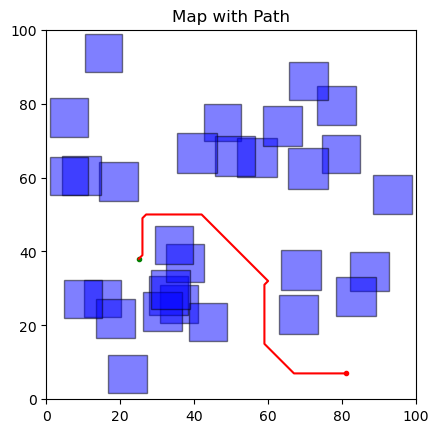

In [16]:
import pickle
import heapq

with open('map_data.pkl', 'rb') as f:
    map_data = pickle.load(f)

squares = map_data['squares']
start_point = map_data['start_point']
end_point = map_data['end_point']
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

# A* Algorithm Implementation
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(node):
    x, y = node
    neighbors = [
        (x - 1, y), (x + 1, y),
        (x, y - 1), (x, y + 1),
        (x - 1, y - 1), (x - 1, y + 1),
        (x + 1, y - 1), (x + 1, y + 1)
    ]
    valid_neighbors = []
    for nx, ny in neighbors:
        if 0 <= nx < canvas_size and 0 <= ny < canvas_size and not is_point_in_squares((nx, ny), squares, robot_diameter):
            valid_neighbors.append((nx, ny))
    return valid_neighbors

def is_point_in_squares(point, squares, robot_diameter):
    px, py = point
    for (x, y, size) in squares:
        if (x - robot_diameter <= px <= x + size + robot_diameter) and (y - robot_diameter <= py <= y + size + robot_diameter):
            return True
    return False

def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_set:
        current = heapq.heappop(open_set)[1]
        print("Current node:", current)
        
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path

        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            tentative_f_score = tentative_g_score + heuristic(neighbor, goal)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_f_score
                if neighbor not in [item[1] for item in open_set]:
                    heapq.heappush(open_set, (tentative_f_score, neighbor))
                print(f"Adding neighbor: {neighbor}, g_score: {g_score[neighbor]}, f_score: {f_score[neighbor]}")  # 添加邻居节点调试信息
    return None

# Find the path using A* algorithm
path = a_star(start_point, end_point)

if path is None:
    print("No path found")
else:
    print("Path found:", path)

# Plot the map with the found path
fig, ax = plt.subplots()
for (x, y, size) in squares:
    square = plt.Rectangle((x, y), size, size, edgecolor='black', facecolor='blue', alpha=0.5)
    ax.add_patch(square)

# Plot start and end points
ax.plot(start_point[0], start_point[1], 'go', markersize=robot_diameter)  # Green start point
ax.plot(end_point[0], end_point[1], 'ro', markersize=robot_diameter)  # Red end point

# Plot the path
if path:
    path_x, path_y = zip(*path)
    ax.plot(path_x, path_y, 'r-')  # Red path

# Set plot parameters
ax.set_xlim(0, canvas_size)
ax.set_ylim(0, canvas_size)
ax.set_aspect('equal', adjustable='box')
plt.title("Map with Path")
plt.show()


In [ ]:
import pickle
import heapq

with open('map_data.pkl', 'rb') as f:
    map_data = pickle.load(f)

squares = map_data['squares']
start_point = map_data['start_point']
end_point = map_data['end_point']
canvas_size = 100  # Size of the canvas
robot_diameter = 3  # Diameter of the robot

